Association Analysis and Deep learning (10 points)

Dr. Shen-Shyang Ho

October 27, 2022

• In this assignment, you will be using the dataset assigned to you in Assignment 1 for a Deep Learning Task and a newly assigned dataset for an association analysis task.

• For the association analysis task, you will use Mlxtend (http://rasbt.github.io/mlxtend/)

• For the deep learning task, you will use Tensorflow (https://www.tensorflow.org/) via Keras (https://keras.io/) or PyTorch (https://pytorch.org/)

1. [Association Rule Generation from Transaction Data]

(a) Download transaction dataset to your local drive.

i. Go to the following Google Drive link (Students must be logged in to their Rowan accounts):

https://drive.google.com/drive/folders/1LuFEbgq3IvisEXT1jOZ-H4jWeqzqEH3m?usp=sharing

(b) Download the ’Grocery Items {DATASET NUMBER}.csv’ file from the Google Drive Link.

(c) Using minimum support = 0.01 for the Apriori Algorithm, extract the frequent itemsets from your dataset. (1 point) (see http://rasbt.github.io/mlxtend/user guide/frequent patterns/apriori/)

(d) Using minimum support = 0.01 and minimum confidence threshold = 0.1, what are the association rules you can extract from your dataset? (1 point)

(see http://rasbt.github.io/mlxtend/user guide/frequent patterns/association rules/)

(e) List the association rule(s) (i.e., one or more rules depending on your dataset) that have the highest confidence. What is that confidence value? (1 point)

2. [Image Classification using CNN] A 4-class classification (ignore negative class) using a convolutional neural network with the following simple architecture (2 point)

(a) 1 Convolutional Layer with 8 3 × 3 filters.

(b) 1 max pooling with 2 × 2 pool size

(c) Flatten the Tensor

(d) 1 hidden layer with 16 nodes for fully connected neural network

(e) Output layer has 4 nodes (since 4 classes) using ‘softmax’ activation function.

(Use ’Relu’ for all layers except the output layer.) for 5 epochs using ’adam’ optimizer and ’categorical cross entropy’ loss function. For validation split, you will use 20%. For batch size, you can pick a size that will not slow down the training process on your machine. (see https://keras.io/examples/vision/mnist convnet/)

• Plot a graph to show the learning curves (i.e., x-axis: number of epochs; y-axis: training and validation accuracy - 2 curves) (1 points)

• Do ONE of the following (1 point):

(a) Train the CNN using 2 other filter size: 5 × 5 and 7 × 7 with all other parameters unchanged

(b) Train the CNN using 2 other number of filters: 4 and 16 with all other parameters unchanged

(c) Train the CNN using 2 other number of nodes in the hidden layer: 8 and 32 with all other parameters unchanged

• Plot the learning curves (i.e., x-axis: number of epochs; y-axis: training and validation accuracy - 2 curves) for the above 2 configurations (1 points)

• Describe and discuss what you observe by comparing the model performances. Do the models overfit or underfit or just right? Are the models performing better than the classifiers you used in Assignment 2? Compare their performances. (2 point)


In [2]:
import pandas as pd
import mlxtend
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
dataset = pd.read_csv("C:/Users/SHARMISHA/Desktop/Data Mining -1/Programming Assignment - 3/Grocery_Items_67.csv")
dataset.fillna('empty',inplace=True)
print(dataset)

                             0                  1               2          3  \
0     long life bakery product        butter milk           empty      empty   
1                   rolls/buns          chocolate           empty      empty   
2                domestic eggs         rolls/buns           empty      empty   
3                   rolls/buns   other vegetables           empty      empty   
4                       onions  frozen vegetables            curd      empty   
...                        ...                ...             ...        ...   
7995              citrus fruit         newspapers           candy      empty   
7996    frozen potato products        chewing gum           empty      empty   
7997               frankfurter               meat  roll products   pip fruit   
7998                whole milk      bottled water      whole milk      empty   
7999                rolls/buns  frozen vegetables           empty      empty   

          4      5      6      7      8

In [5]:
dataset_list=dataset.values.tolist()
dataset_list

[['long life bakery product',
  'butter milk',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty'],
 ['rolls/buns',
  'chocolate',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty'],
 ['domestic eggs',
  'rolls/buns',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty'],
 ['rolls/buns',
  'other vegetables',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty'],
 ['onions',
  'frozen vegetables',
  'curd',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty'],
 ['beef',
  'newspapers',
  'misc. beverages',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty'],
 ['liver loaf',
  'fruit/vegetable juice',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty',
  'empty'],
 ['yogurt',
  'rolls/buns',
  'empty

In [6]:
transaction_encoder = TransactionEncoder()
transaction_encoder_array = transaction_encoder.fit(dataset_list).transform(dataset_list)
dataset = pd.DataFrame(transaction_encoder_array, columns=transaction_encoder.columns_)
dataset.drop('empty',inplace=True,axis=1)
dataset

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


### 1.c. Using minimum support = 0.01 for the Apriori Algorithm, extract the frequent itemsets from your dataset. (1 point)

In [7]:
frequent_items = apriori(dataset, min_support=0.01, use_colnames=True)
frequent_items 

,support,itemsets
0,0.019250,(UHT-milk)
1,0.036625,(beef)
2,0.020750,(berries)
3,0.015625,(beverages)
4,0.047875,(bottled beer)
...,...,...
64,0.011000,"(rolls/buns, other vegetables)"
65,0.014625,"(whole milk, other vegetables)"
66,0.014125,"(whole milk, rolls/buns)"
67,0.011500,"(soda, whole milk)"


### 1.d. Using minimum support = 0.01 and minimum confidence threshold = 0.1, what are the association rules you can extract from your dataset? (1 point)

In [8]:
rule = association_rules(frequent_items, metric="confidence", min_threshold=0.1)
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(rolls/buns),(other vegetables),0.10950,0.123000,0.011000,0.100457,0.816720,-0.002469,0.974939
1,(other vegetables),(whole milk),0.12300,0.155625,0.014625,0.118902,0.764032,-0.004517,0.958322
2,(rolls/buns),(whole milk),0.10950,0.155625,0.014125,0.128995,0.828886,-0.002916,0.969427
3,(soda),(whole milk),0.09500,0.155625,0.011500,0.121053,0.777848,-0.003284,0.960666
4,(yogurt),(whole milk),0.08425,0.155625,0.011375,0.135015,0.867565,-0.001736,0.976173


### 1. e. List the association rule(s) (i.e., one or more rules depending on your dataset) that have the highest confidence. What is that confidence value? (1 point)

In [9]:
maximum_confidence = rule.loc[rule['confidence'].idxmax()]
maximum_confidence

antecedents               (yogurt)
consequents           (whole milk)
antecedent support         0.08425
consequent support        0.155625
support                   0.011375
confidence                0.135015
lift                      0.867565
leverage                 -0.001736
conviction                0.976173
Name: 4, dtype: object

### 2. [Image Classification using CNN] A 4-class classification (ignore negative class) using a convolutional neural network with the following simple architecture (2 point)

(a) 1 Convolutional Layer with 8 3 × 3 filters.

(b) 1 max pooling with 2 × 2 pool size

(c) Flatten the Tensor

(d) 1 hidden layer with 16 nodes for fully connected neural network

(e) Output layer has 4 nodes (since 4 classes) using ‘softmax’ activation function.

In [27]:
df = pd.read_csv("C:/Users/SHARMISHA/Downloads/Weed-4class-67/Weed-4class-67-labels.csv")
df=pd.get_dummies(df,columns=['Species'])


df.tail()

,Filename,Label,Species_Parkinsonia,Species_Prickly acacia,Species_Rubber vine,Species_Siam weed
4171,20171102-123535-3.jpg,2,1,0,0,0
4172,20171102-123549-2.jpg,2,1,0,0,0
4173,20171102-123554-3.jpg,2,1,0,0,0
4174,20171102-123606-2.jpg,2,1,0,0,0
4175,20171102-123636-2.jpg,2,1,0,0,0


In [28]:
import pandas as pd 
import numpy as np
import matplotlib.image as mpimg
from shutil import copyfile, rmtree
import os
import random
import cv2
import glob
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU, Flatten, Dropout, Lambda
from tensorflow.keras.layers import Embedding
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold , cross_val_score

from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.models import Sequential
from keras.utils import np_utils as utils
from keras.layers import Dropout, Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

from tensorflow import keras
from tensorflow.keras import layers



In [31]:
image_height=64
image_width=64

store_list=[]
for i in tqdm(range(df.shape[0])):
    path= "C:/Users/SHARMISHA/Downloads/Weed-4class-67/Weed-4class-67/"+df['Filename'][i]
    image_1 = image.load_img(path)
    image_1=image.img_to_array(image_1)
    image_1=image_1/255
    store_list.append(image_1)
X=np.array(store_list)


100%|██████████| 4176/4176 [00:20<00:00, 207.95it/s]


In [33]:
df1=df

In [34]:
y=df1.drop(columns=['Filename','Label'])
print(y.value_counts())
y=y.to_numpy()
print(y.shape),print(type(y))

Species_Parkinsonia  Species_Prickly acacia  Species_Rubber vine  Species_Siam weed
0                    0                       0                    1                    1074
                     1                       0                    0                    1062
1                    0                       0                    0                    1031
0                    0                       1                    0                    1009
dtype: int64
(4176, 4)
<class 'numpy.ndarray'>


(None, None)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
X_train.shape

(3340, 256, 256, 3)

In [38]:
X_train[0].shape

(256, 256, 3)

In [42]:
model = Sequential()

In [43]:
model.add(Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 8)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 129032)            0         
                                                                 
 dense (Dense)               (None, 16)                2064528   
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
Total params: 2,064,820
Trainable params: 2,064,820
Non-trainable params: 0
______________________________________________

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
hist = model.fit(X_train,y_train,batch_size=32, epochs= 5, validation_data= (X_test, y_test))

Epoch 1/5
105/105 [==============================] - 63s 541ms/step - loss: 1.9552 - accuracy: 0.2560 - val_loss: 1.3856 - val_accuracy: 0.2811
Epoch 2/5
105/105 [==============================] - 49s 468ms/step - loss: 1.3864 - accuracy: 0.2476 - val_loss: 1.3858 - val_accuracy: 0.2811
Epoch 3/5
105/105 [==============================] - 51s 489ms/step - loss: 1.3863 - accuracy: 0.2497 - val_loss: 1.3861 - val_accuracy: 0.2392
Epoch 4/5
105/105 [==============================] - 72s 685ms/step - loss: 1.3861 - accuracy: 0.2617 - val_loss: 1.3863 - val_accuracy: 0.2392
Epoch 5/5
105/105 [==============================] - 53s 505ms/step - loss: 1.3861 - accuracy: 0.2617 - val_loss: 1.3866 - val_accuracy: 0.2392


### 2.a. Plot a graph to show the learning curves (i.e., x-axis: number of epochs; y-axis: training and validation accuracy - 2 curves) (1 points)

In [47]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.3865807056427002
Test accuracy: 0.23923444747924805


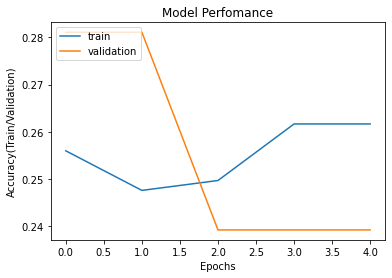

In [49]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("Model Perfomance")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy(Train/Validation)")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()
    
plot_hist(hist)

### 2.b. Do ONE of the following (1 point):

(a) Train the CNN using 2 other filter size: 5 × 5 and 7 × 7 with all other parameters unchanged

(b) Train the CNN using 2 other number of filters: 4 and 16 with all other parameters unchanged

(c) Train the CNN using 2 other number of nodes in the hidden layer: 8 and 32 with all other
parameters unchanged

In [50]:
model_2=Sequential()

In [51]:
model_2.add(Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))
model_2.add(Conv2D(4, kernel_size=(5,5), activation='relu', input_shape=(256,256,3)))
model_2.add(Conv2D(16, kernel_size=(7,7), activation='relu', input_shape=(256,256,3)))

model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Flatten())

model_2.add(Dense(8, activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(4, activation='softmax'))

In [52]:
model_2.compile(optimizer="adam", loss=tf.losses.CategoricalCrossentropy(),metrics=["accuracy"] )

In [53]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 8)       224       
                                                                 
 conv2d_2 (Conv2D)           (None, 250, 250, 4)       804       
                                                                 
 conv2d_3 (Conv2D)           (None, 244, 244, 16)      3152      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 122, 122, 16)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 238144)            0         
                                                                 
 dense_2 (Dense)             (None, 8)                 1905160   
                                                      

In [54]:
hist1=model_2.fit(X_train,y_train,batch_size=32, epochs= 5, validation_data= (X_test, y_test))

Epoch 1/5
105/105 [==============================] - 436s 4s/step - loss: 1.3826 - accuracy: 0.2677 - val_loss: 1.2648 - val_accuracy: 0.4462
Epoch 2/5
105/105 [==============================] - 437s 4s/step - loss: 1.1443 - accuracy: 0.4431 - val_loss: 1.0643 - val_accuracy: 0.4689
Epoch 3/5
105/105 [==============================] - 350s 3s/step - loss: 0.9810 - accuracy: 0.5054 - val_loss: 0.9977 - val_accuracy: 0.4964
Epoch 4/5
105/105 [==============================] - 322s 3s/step - loss: 0.8259 - accuracy: 0.5698 - val_loss: 0.9723 - val_accuracy: 0.4856
Epoch 5/5
105/105 [==============================] - 321s 3s/step - loss: 0.7176 - accuracy: 0.6099 - val_loss: 1.1525 - val_accuracy: 0.4856


### 2.c. Plot the learning curves (i.e., x-axis: number of epochs; y-axis: training and validation accuracy - 2 curves) for the above 2 configurations (1 points)

In [55]:
score = model_2.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.152518391609192
Test accuracy: 0.48564592003822327


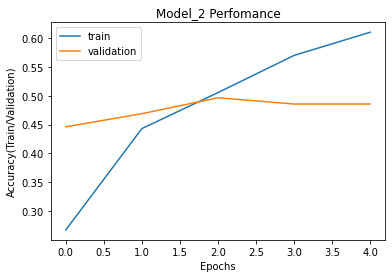

In [56]:
def plot_hist(hist1):
    plt.plot(hist1.history["accuracy"])
    plt.plot(hist1.history["val_accuracy"])
    plt.title("Model_2 Perfomance")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy(Train/Validation)")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()
    
plot_hist(hist1)

### 2.d. Describe and discuss what you observe by comparing the model performances. Do the models overfit or underfit or just right? Are the models performing better than the classifiers you used in Assignment 2? Compare their performances. (2 point)


The 2nd model has highest accuracy i.e, 50% compared to model 1. Since we have took 5 Epoch we got less accuracy instead,
if we have considered more Epoch then we could have got more accuracy.

The models got underfit.

By the graph we got from CNN we can conclude that CNN is the best classifier than,
compare to the classifiers we performed in the Programming Assignment 2.